<a href="https://colab.research.google.com/github/ShakeelRaja/hotel_price_prediction/blob/master/hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
#!pip install fbprophet

Saving cleared_data.csv to cleared_data (2).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.style.use('ggplot')

In [ ]:
data = pd.read_csv('cleared_data.csv')

In [ ]:
data.head()

,Date,Occupancy,Competitor Occupancy,Competitor Price,Price
0,12/31/2017,20.5,29.6,49.34,47.93
1,01/01/2018,17.0,24.0,45.40,46.90
2,01/02/2018,25.6,24.7,47.98,47.61
3,01/03/2018,21.5,18.6,55.60,52.01
4,01/04/2018,19.9,17.4,48.75,45.71


In [ ]:
data.tail()

,Occupancy,Competitor Occupancy,Competitor Price,Price
Date,,,,
2019-12-27,49.0,30.6,67.97,46.36
2019-12-28,100.0,29.7,64.84,43.41
2019-12-29,17.4,28.0,66.75,56.08
2019-12-30,9.7,33.5,69.07,52.25
2019-12-31,13.2,37.2,64.50,56.01


In [ ]:
data['Date'] =  pd.to_datetime(data['Date'])#, format='%d%b%Y:%H:%M:%S.%f')
data.set_index('Date', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2017-12-31 to 2019-12-31
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Occupancy             731 non-null    float64
 1   Competitor Occupancy  731 non-null    float64
 2   Competitor Price      731 non-null    float64
 3   Price                 731 non-null    float64
dtypes: float64(4)
memory usage: 28.6 KB


In [ ]:
data.head()

,Occupancy,Competitor Occupancy,Competitor Price,Price
Date,,,,
2017-12-31,20.5,29.6,49.34,47.93
2018-01-01,17.0,24.0,45.40,46.90
2018-01-02,25.6,24.7,47.98,47.61
2018-01-03,21.5,18.6,55.60,52.01
2018-01-04,19.9,17.4,48.75,45.71


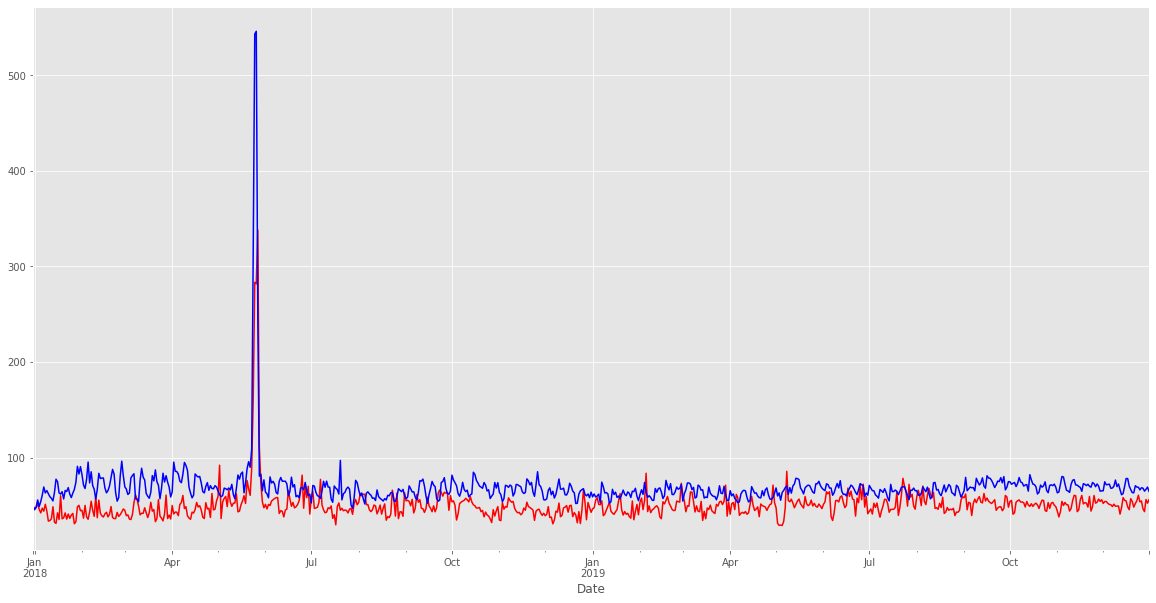

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
data.Price.plot(color='r')
data['Competitor Price'].plot(color='b')

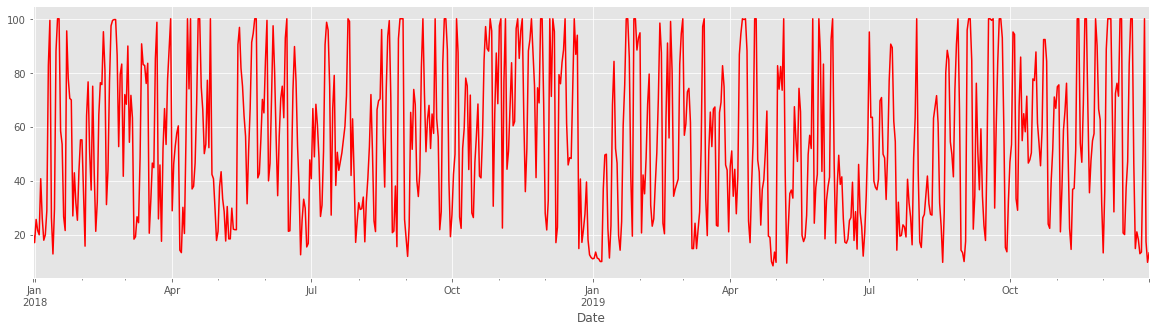

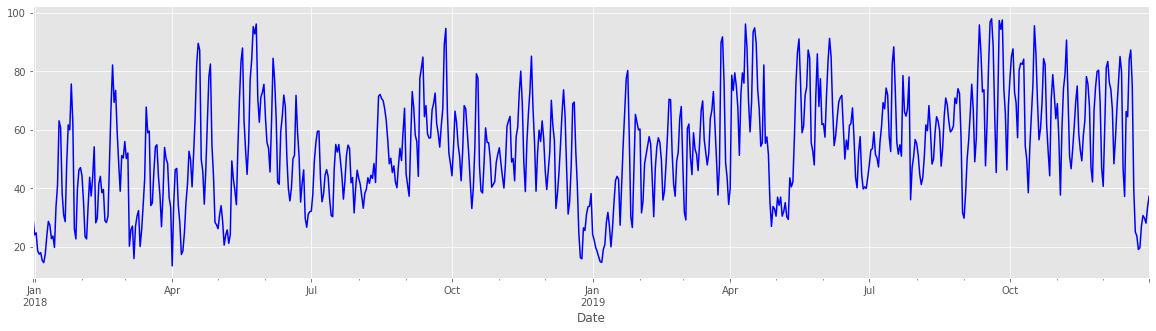

In [ ]:
rcParams['figure.figsize'] = 20, 5
data.Occupancy.plot(color='r')
plt.show()
data['Competitor Occupancy'].plot(color='b')

In [ ]:
data.corr()

,Occupancy,Competitor Occupancy,Competitor Price,Price
Occupancy,1.000000,0.504057,0.146710,-0.133148
Competitor Occupancy,0.504057,1.000000,0.191418,0.151859
Competitor Price,0.146710,0.191418,1.000000,0.769080
Price,-0.133148,0.151859,0.769080,1.000000


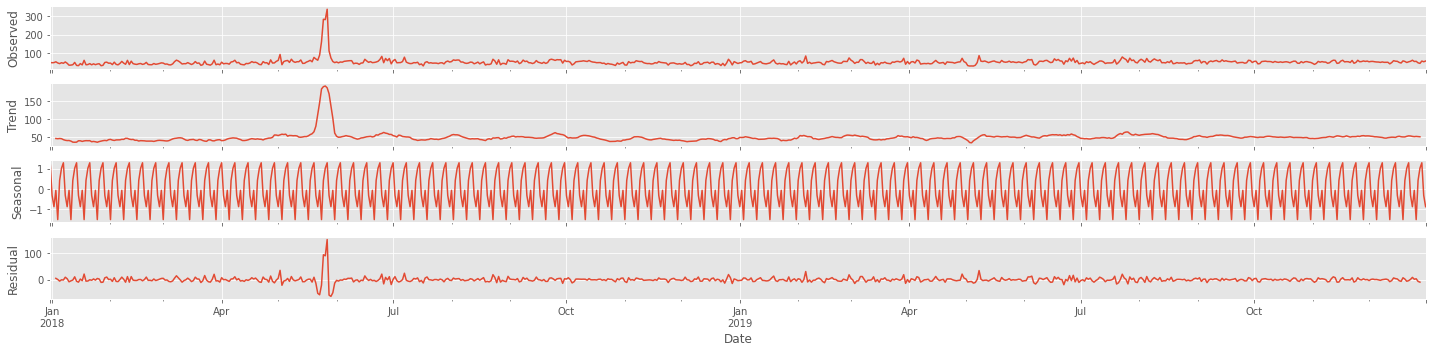

In [ ]:
p = data.Price
decomposition = sm.tsa.seasonal_decompose(p, model = 'additive')
fig= decomposition.plot()


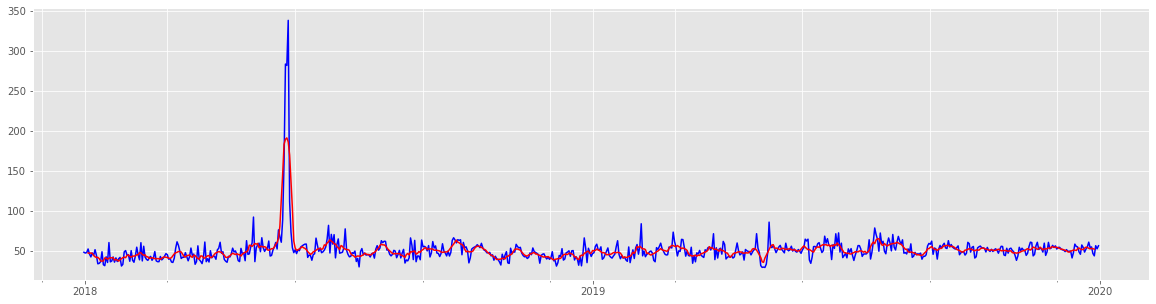

In [ ]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(data.index, data['Price'], c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')


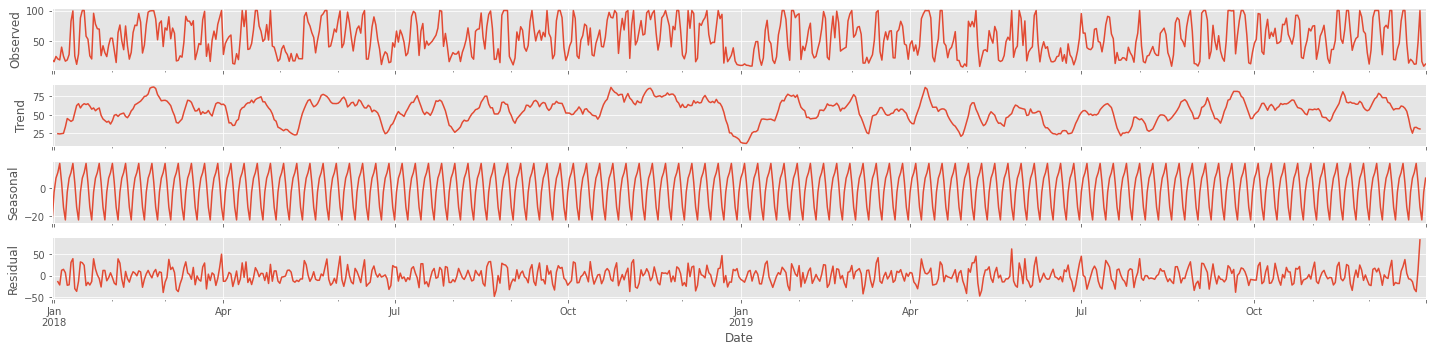

In [ ]:
p = data['Occupancy']
decomposition = sm.tsa.seasonal_decompose(p, model = 'additive')
fig= decomposition.plot()


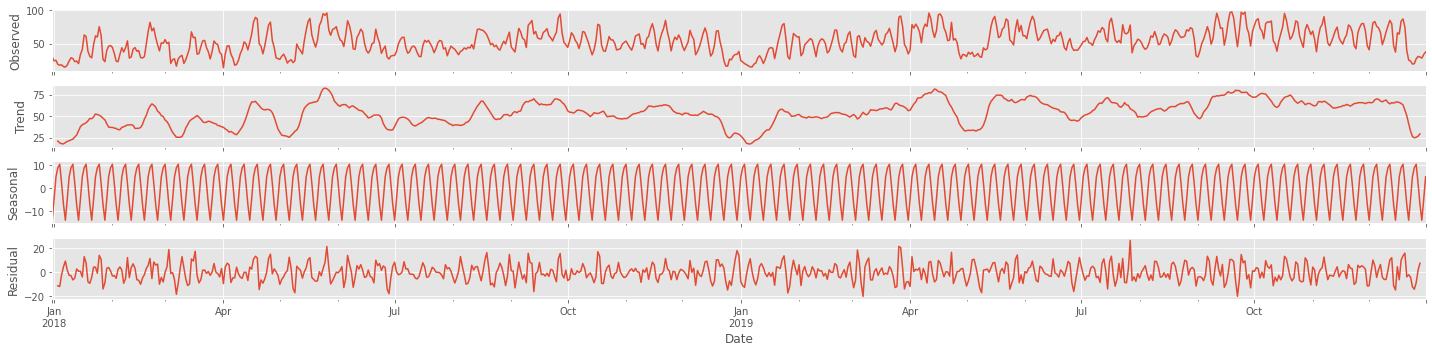

In [ ]:
p = data['Competitor Occupancy']
decomposition = sm.tsa.seasonal_decompose(p, model = 'additive')
fig= decomposition.plot()


In [ ]:
from fbprophet import Prophet

In [ ]:
data['ds'] = data.index
data['y'] = data.Price
data.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2017-12-31 to 2019-12-31
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Occupancy             731 non-null    float64       
 1   Competitor Occupancy  731 non-null    float64       
 2   Competitor Price      731 non-null    float64       
 3   Price                 731 non-null    float64       
 4   ds                    731 non-null    datetime64[ns]
 5   y                     731 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 40.0 KB


In [ ]:
ts = data[['ds', 'y']]
ts.reset_index(inplace= True)
ts, ts.tail()

(          Date         ds      y
 0   2017-12-31 2017-12-31  47.93
 1   2018-01-01 2018-01-01  46.90
 2   2018-01-02 2018-01-02  47.61
 3   2018-01-03 2018-01-03  52.01
 4   2018-01-04 2018-01-04  45.71
 ..         ...        ...    ...
 726 2019-12-27 2019-12-27  46.36
 727 2019-12-28 2019-12-28  43.41
 728 2019-12-29 2019-12-29  56.08
 729 2019-12-30 2019-12-30  52.25
 730 2019-12-31 2019-12-31  56.01
 
 [731 rows x 3 columns],           Date         ds      y
 726 2019-12-27 2019-12-27  46.36
 727 2019-12-28 2019-12-28  43.41
 728 2019-12-29 2019-12-29  56.08
 729 2019-12-30 2019-12-30  52.25
 730 2019-12-31 2019-12-31  56.01)

In [ ]:
Model = Prophet(interval_width=0.8, daily_seasonality=True)

In [ ]:
Model.fit(ts)

In [ ]:
future_dates = Model.make_future_dataframe(periods=365, freq='D')
future_dates.tail()

,ds
1091,2020-12-26
1092,2020-12-27
1093,2020-12-28
1094,2020-12-29
1095,2020-12-30


In [ ]:
forecast = Model.predict(future_dates)
forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-12-31,47.414518,23.125140,68.355501,47.414518,47.414518,-0.494656,-0.494656,-0.494656,-1.960128,-1.960128,-1.960128,1.297060,1.297060,1.297060,0.168413,0.168413,0.168413,0.0,0.0,0.0,46.919862
1,2018-01-01,47.461247,21.483625,67.243674,47.461247,47.461247,-2.341647,-2.341647,-2.341647,-1.960128,-1.960128,-1.960128,-0.320963,-0.320963,-0.320963,-0.060555,-0.060555,-0.060555,0.0,0.0,0.0,45.119600
2,2018-01-02,47.507976,21.017049,67.858370,47.507976,47.507976,-3.172650,-3.172650,-3.172650,-1.960128,-1.960128,-1.960128,-0.829375,-0.829375,-0.829375,-0.383147,-0.383147,-0.383147,0.0,0.0,0.0,44.335326
3,2018-01-03,47.554705,24.417352,67.143620,47.554705,47.554705,-2.810517,-2.810517,-2.810517,-1.960128,-1.960128,-1.960128,-0.061993,-0.061993,-0.061993,-0.788396,-0.788396,-0.788396,0.0,0.0,0.0,44.744188
4,2018-01-04,47.601434,20.490761,63.947291,47.601434,47.601434,-4.724741,-4.724741,-4.724741,-1.960128,-1.960128,-1.960128,-1.501410,-1.501410,-1.501410,-1.263203,-1.263203,-1.263203,0.0,0.0,0.0,42.876694


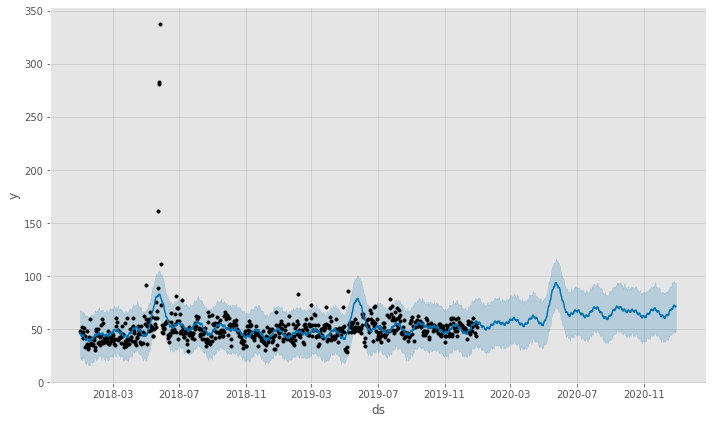

In [ ]:
Model.plot(forecast, uncertainty=True)
plt.show()

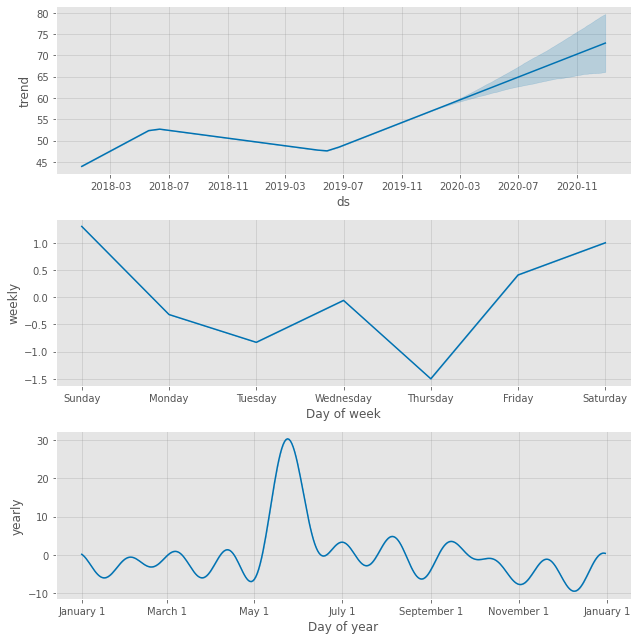

In [ ]:
Model.plot_components(forecast)
plt.show()

In [ ]:
Model.changepoints

23    2018-01-23
47    2018-02-16
70    2018-03-11
93    2018-04-03
117   2018-04-27
140   2018-05-20
163   2018-06-12
187   2018-07-06
210   2018-07-29
233   2018-08-21
257   2018-09-14
280   2018-10-07
303   2018-10-30
326   2018-11-22
350   2018-12-16
373   2019-01-08
396   2019-01-31
420   2019-02-24
443   2019-03-19
466   2019-04-11
490   2019-05-05
513   2019-05-28
536   2019-06-20
560   2019-07-14
583   2019-08-06
Name: ds, dtype: datetime64[ns]

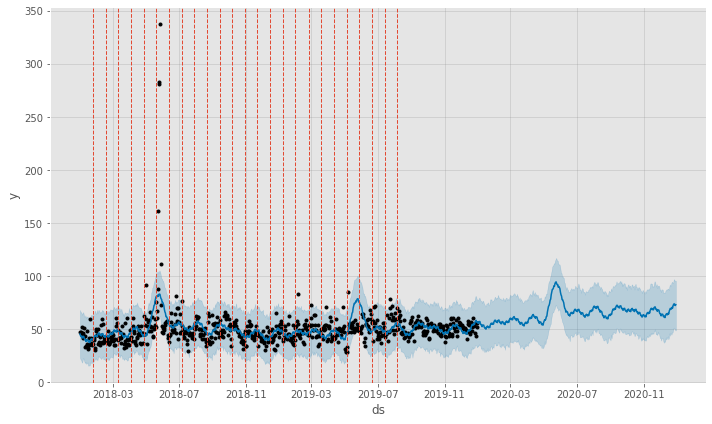

In [ ]:
figure = Model.plot(forecast)
for changepoint in Model.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)